<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Multiple regression with the problem of correlated predictors</h1>
### Brian Mapes, MPO624, Spring 2018

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

## Deep in a rainforest, where it rains every day, 
### convective rainfall (the daily total, in cm) depends on many factors or _ingredients_. 

Two main ones are Lapse Rate (LR, in K/km) and Precipitable Water (PW in mm). These are _correlated_: unstable days are also moist days!

Others include the happenstance of turbulent triggering processes, etc. Also convection may have _nonlinear_ dependences on factors, which could be Taylor expanded as dependence on $LR^2, PW^2, LR \times PW$, etc. etc. All these other and nonlinear terms can be lumped together as "other". 

#### So let's build nature's secret process as a sum of 3 factors: LR, PW, and 'other'. 

In [2]:
# Building Nature's secret reality. Don't look, this is mysterious. (OK, yeah, I am using random numbers)
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Let's make some weather: 365 days. Remember, LR and PW are correlated!
N=365

# The factors that govern rainfall R. Don't look! Nature is secretly a random number generator!
LR = np.random.randn(N); ntosig = 0.8 ; PW = LR + np.random.randn(N)*ntosig; other = np.random.randn(N)
R = 1.0*LR + 2.0*PW + other
   
fig,ax=plt.subplots(1,1)
cs = ax.scatter(LR, PW, c=R, cmap=plt.cm.RdBu_r, vmin=-5, vmax=5); plt.xlim(-5, 5); plt.ylim(-5, 5)

ax.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax.set_ylabel('Precipitable Water anomaly PW (K/km)')
ax.set_title('Rainfall R (cm) vs. 2 factors')
cbar = fig.colorbar(cs)

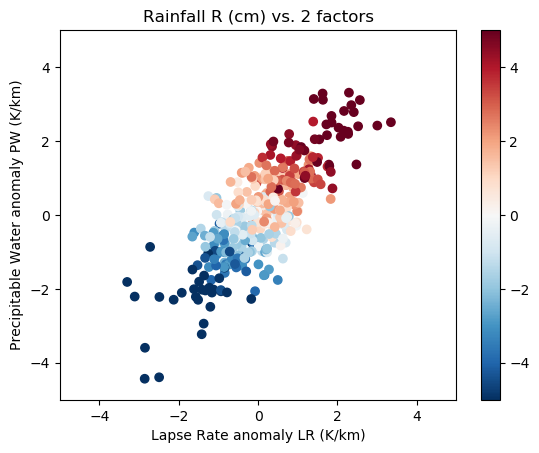

In [3]:
fig

## Intrepid scientists measure LR and PW 
### They also try to measure R, but with too few raingauges and imperfect radar

In [4]:
Rmeas_error = np.random.randn(N)*0.5
Rmeas = R + Rmeas_error

## Let's explore our dataset: LR, PW, and $R_{meas}$

Text(0,0.5,'Precipitable Water anomaly PW (mm)')

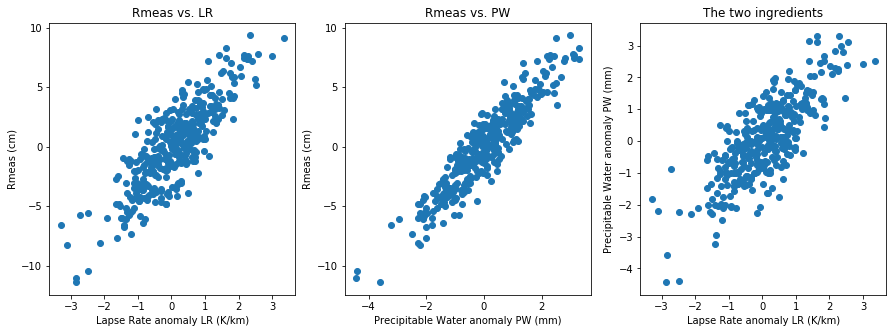

In [5]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(LR, Rmeas) 
ax1.set_title('Rmeas vs. LR')
ax1.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax1.set_ylabel('Rmeas (cm)')

ax2.scatter(PW, Rmeas) 
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water anomaly PW (mm)')
ax2.set_ylabel('Rmeas (cm)')

ax3.scatter(LR, PW) 
ax3.set_title('The two ingredients')
ax3.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax3.set_ylabel('Precipitable Water anomaly PW (mm)')

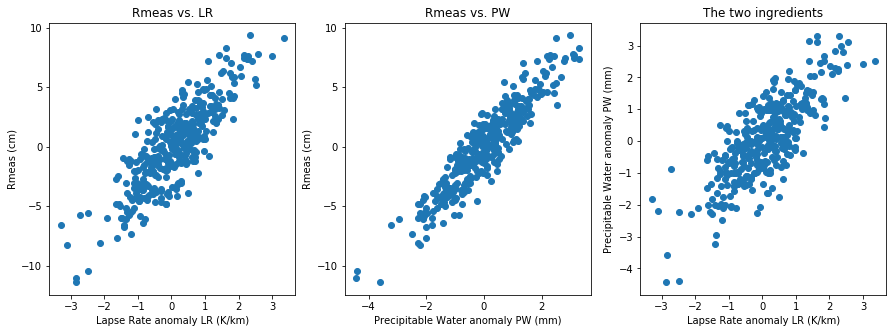

In [6]:
fig2

#### A lapse-rate extremist postulates $R_{meas} = a \times LR$ is the one true signal
#### A PW extremist postulates $R_{meas} = b \times PW$ is the one true signal 
#### A generalizer postulates $R_{meas} = c \times LR + d \times PW$ is nature's process

###  Can we adjudicate, from noisy $R_{meas}$ data, with "other" factors unmeasured? 
### Is c=a? Is d=b? 

### The LR extremist's regression

In [7]:
a = np.corrcoef(LR,Rmeas)[1,0] *np.std(Rmeas)/np.std(LR)
print('a = ',a, 'cm per (K/km)')

a =  2.912270772770193 cm per (K/km)


## EXERCISE 1: overlay the line aLR on the Rmeas-LR scatter plot

### The PW extremist's regression

In [8]:
b = np.corrcoef(PW,Rmeas)[1,0] *np.std(Rmeas)/np.std(PW)
print('b = ',b, 'cm per (mm)')

b =  2.6109136719403407 cm per (mm)


## EXERCISE 2: overlay the line aLR on the Rmeas-LR scatter plot

### The generalizer's regression

In [9]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# FOr 2D interpolation, pack up the data in right shaped container:
indata = np.zeros( (N,2) )
indata[:,0] = LR
indata[:,1] = PW

# Fit and display
reg.fit(indata,Rmeas)
print('c, d = ', reg.coef_, 'cm per K/km, and cm per mm')
c=reg.coef_[0]
d=reg.coef_[1]

c, d =  [1.02128889 1.95892103] cm per K/km, and cm per mm


## EXERCISE 3: Express the above results graphically

Text(0,0.5,'Precipitable Water anomaly PW (mm)')

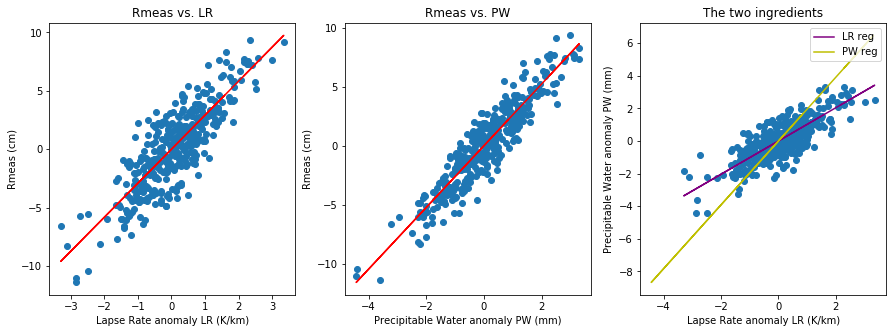

In [15]:
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(LR, Rmeas) 
ax1.plot(LR, LR*a,'r')
ax1.set_title('Rmeas vs. LR')
ax1.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax1.set_ylabel('Rmeas (cm)')

ax2.scatter(PW, Rmeas) 
ax2.plot(PW,b*PW,'r')
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water anomaly PW (mm)')
ax2.set_ylabel('Rmeas (cm)')

ax3.scatter(LR, PW) 
ax3.plot(LR,LR*c,color='purple',label='LR reg')
ax3.plot(PW,PW*d,'y',label='PW reg')
ax3.legend(loc=1)
ax3.set_title('The two ingredients')
ax3.set_xlabel('Lapse Rate anomaly LR (K/km)')
ax3.set_ylabel('Precipitable Water anomaly PW (mm)')

## EXERCISE 4: Find the residuals, the _unexplained variance_ 
#### that is, $(R_{meas} - model)^2$
### for all 3 postulated models. 

## _Can you say that one model is better than another?_

## EXERCISE 5: Explain what is wrong with postulating  
### $R_{meas} = a \times LR + b \times PW$

## To do this, scatter plot its residual against $R_{meas}$. 
### _What principle about postulated models is violated?_


In [24]:
# Residual for postulates
residual1 = (Rmeas - a*LR)**2
print('Residual for LR model is '+str(residual1))
residual2 = (Rmeas - b*PW)**2
print('Residual for PW model is '+str(residual2))
residual3 = (Rmeas - (c*LR+d*PW))**2



Residual for LR model is [2.06242464e+00 3.48409751e-01 1.01674633e+01 6.34050538e-02
 2.14004117e-03 3.45806390e+00 2.94530807e+00 1.49269669e+01
 1.25786299e+01 6.12334941e+00 2.18993893e+00 8.37235377e+00
 4.04626770e-03 5.60691078e-02 6.44645149e-01 6.63823853e+00
 6.26695792e+00 3.69190203e+00 8.73194478e-01 2.06383880e+00
 9.99495643e+00 8.79360768e-02 1.14404615e+00 9.80441059e+00
 4.91691450e+00 1.01523879e+00 9.52762518e+00 4.36510494e+00
 4.30855275e+00 9.70455516e-01 2.22732166e+00 3.80580006e-01
 5.08051003e+00 8.76987494e-02 2.04238327e-01 1.03166533e+01
 5.45993452e-01 3.77786953e+00 7.18071777e+00 8.39433677e-01
 7.06520794e-01 2.00996718e+00 2.99505329e+00 5.19649647e-03
 2.47106109e+00 9.28790863e+00 9.14938449e-01 3.34418967e+00
 3.64454875e-01 2.74716834e+00 3.19062097e+00 5.05728680e+00
 1.05629177e+00 1.06230101e+01 2.13486824e+01 6.32897412e-03
 2.65482026e+00 8.57073161e-02 2.64283633e-01 6.66823892e+00
 1.55873922e+00 1.17829805e+00 5.33372397e-01 2.68468237e+00

Text(0.5,0,'Rmeas (cm)')

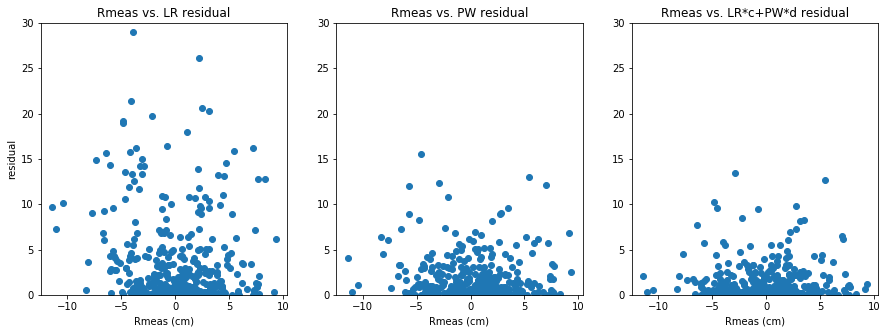

In [25]:
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(Rmeas,residual1) 
ax1.set_ylim((0,30))
ax1.set_title('Rmeas vs. LR residual')
ax1.set_xlabel('Rmeas (cm)')
ax1.set_ylabel('residual')

ax2.scatter(Rmeas, residual2) 
ax2.set_title('Rmeas vs. PW residual')
ax2.set_ylim((0,30))
ax2.set_xlabel('Rmeas (cm)')
#ax2.set_ylabel('Rmeas (cm)')

ax3.scatter(Rmeas, residual3) 
ax3.set_ylim((0,30))
ax3.set_title('Rmeas vs. LR*c+PW*d residual')
ax3.set_xlabel('Rmeas (cm)')
#ax3.set_ylabel('Rmeas (cm)')

The LR*c + PW*d residual is the smallest of the three models, therefore it can be seen that convective rainfall can be best explained by both the lapse rate and precipitable water.


However, in order to do a multiple linear regression, the two variables should not be correlated with each other. In this instance, lapse rate and precipitable water are correlated with each other, not just with the rainfall. 